In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [109]:
def step_time(c):
    t = ord(c) - ord('A') + 1
    return t

class Worker:
    def __init__(self, c='.', nticks=0):
        self.c = c
        self.nticks = nticks
        self.free = True

    @property
    def tick(self):
        if self.nticks <= 0:
            self.free = True
            self.c = "."
            return self.c
        if self.nticks > 0:
            self.nticks -= 1
            return self.c
        if self.free:
            self.c = "."
            return self.c
        
    def run(self, c, nticks):
        self.free = False
        self.c = c
        self.nticks = nticks

In [52]:
[(c, G[c]) for c in G.nodes]

[('C', AtlasView({'A': {}, 'F': {}})),
 ('A', AtlasView({'B': {}, 'D': {}})),
 ('F', AtlasView({'E': {}})),
 ('B', AtlasView({'E': {}})),
 ('D', AtlasView({'E': {}})),
 ('E', AtlasView({}))]

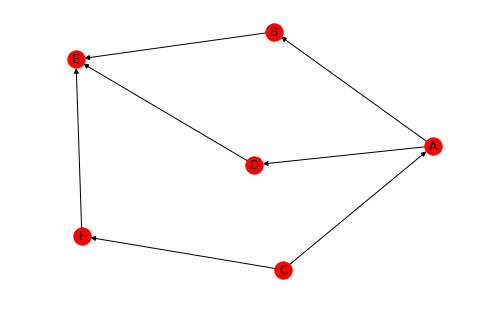

In [15]:
nx.draw(G, with_labels=True)
plt.show()

In [149]:
G = nx.DiGraph()
with open("test", 'r') as fp:
    for l in fp.readlines():
        words = l.strip().split()
        c1, c2 = words[1], words[7]
        n1, n2 = G.add_node(c1, time=step_time(c1)), G.add_node(c2, time=step_time(c2))
        G.add_edge(c1, c2)

In [150]:
ticker = 0
result = ""
ready_list = []
for n in G.nodes:
    if len(list(G.predecessors(n))) == 0:
        ready_list.append(n)
running_list = []
workers = (Worker(), Worker())
print("Second   Worker 1   Worker 2   Done")
while (len(ready_list) + len(running_list)) > 0 and len(list(G.nodes)) > 0:
    for node in ready_list:
        if len(list(G.predecessors(node))) > 0 or node in running_list:
            continue
        for worker in workers:
            if worker.free:
                worker.run(node, G.nodes[node]['time'])
                ready_list.remove(node)
                running_list.append(node)
                break
    status = []
    for worker in workers:
        prev = worker.c
        worker.tick
        if worker.free:
            result += prev
        else:
            status.append(worker.c)
    print("{}    {}     {}".format(ticker, "   ".join(status), result))
    ticker += 1
    for running in running_list:
        if running not in status:
            result += running
            running_list.remove(running)
            ready_list += list(G.successors(running))
            G.remove_node(running)

Second   Worker 1   Worker 2   Done
0    C     .
1    C     ..
2    C     ...
3         ...C.
4    A     ...C.C.
5    F     ...C.C.A
6    B   F     ...C.C.AA
7    B   F     ...C.C.AA
8    F     ...C.C.AAB
9    D   F     ...C.C.AABB
10    D   F     ...C.C.AABB
11    D     ...C.C.AABBF
12    D     ...C.C.AABBFF.
13         ...C.C.AABBFF.D.
14    E     ...C.C.AABBFF.D.D.
15    E     ...C.C.AABBFF.D.D..
16    E     ...C.C.AABBFF.D.D...
17    E     ...C.C.AABBFF.D.D....
18    E     ...C.C.AABBFF.D.D.....
19         ...C.C.AABBFF.D.D.....E.


In [ ]:
for n in G.nodes:
        successors = sorted(list(G[n].keys()))
        predecessors = sorted(list(G.predecessors(n)))
        if len(predecessors) == 0:
            for worker in workers:
                if worker.free:
                    worker.run(n, G.nodes[n]['time'])
                    
        else:
            for p in predecessors:


In [47]:
G.nodes['C']['time']

3

In [45]:
list(G['C'].keys())

['A', 'F']

In [30]:
nx.lexicographical_topological_sort?

In [39]:
G.edges

OutEdgeView([('C', 'A'), ('C', 'F'), ('A', 'B'), ('A', 'D'), ('F', 'E'), ('B', 'E'), ('D', 'E')])

In [69]:
sorted(list(G.predecessors('E')))

['B', 'D', 'F']

In [44]:
list(G.nodes)

['C', 'A', 'F', 'B', 'D', 'E']

In [53]:
G.remove_node('C')

In [58]:
len(G.nodes)

6

In [77]:
list(G.successors('A'))

['B', 'D']

In [60]:
list(G.nodes)[0]

'C'

In [88]:
l = [1, 2]
l.remove(1)
l + [4, 5]

[2, 4, 5]

In [66]:
len(G['C'])

2

In [76]:
print("{} {}".format(0, "   ".join(G.nodes)))

0 C   A   F   B   D   E
